In [1]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt


## Introduction to the CNOT Gate

The **CNOT gate** (Controlled-NOT gate) is a fundamental two-qubit gate in quantum computing. It operates on a **control qubit** and a **target qubit**. The gate flips the target qubit $$ \ket{0} \leftrightarrow \ket{1} $$ only if the control qubit is in the 1 state. It is often represented as CX.

### Truth Table of the CNOT Gate:

| Control $$ \ket{c} $$ | Target $$ \ket{t} $$ | Output $$ \ket{c, t} $$ |
|-------------------------|------------------------|---------------------------|
| $$ \ket{0} $$           | $$ \ket{0} $$         | $$ \ket{0, 0} $$          |
| $$ \ket{0} $$           | $$ \ket{1} $$         | $$ \ket{0, 1} $$          |
| $$ \ket{1} $$           | $$ \ket{0} $$         | $$ \ket{1, 1} $$          |
| $$ \ket{1} $$           | $$ \ket{1} $$         | $$ \ket{1, 0} $$          |

### Matrix Representation of the CNOT Gate:

The CNOT gate acts on a 2-qubit system and can be represented as a 4*4 matrix:
$$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}.
$$

### Action of the CNOT Gate:

If the input state is $$ \ket{c, t} = \alpha \ket{00} + \beta \ket{01} + \gamma \ket{10} + \delta \ket{11} $$ then the output after applying the CNOT gate is:
$$
\text{CNOT} \ket{c, t} = \alpha \ket{00} + \beta \ket{01} + \gamma \ket{11} + \delta \ket{10}.
$$

---

## Introduction to the Toffoli Gate

The **Toffoli gate** (or CCNOT gate) is a three-qubit gate. It operates on two control qubits and one target qubit. The target qubit is flipped $$ \ket{0} \leftrightarrow \ket{1} $$ **only if both control qubits are in the 1 state**.

### Truth Table of the Toffoli Gate:

| Control 1 $$ \ket{c_1} $$ | Control 2 $$ \ket{c_2} $$ | Target $$ \ket{t} $$ | Output $$ \ket{c_1, c_2, t} $$ |
|-----------------------------|----------------------------|------------------------|-----------------------------------|
| $$ \ket{0} $$               | $$ \ket{0} $$             | $$ \ket{0} $$         | $$ \ket{0, 0, 0} $$              |
| $$ \ket{0} $$               | $$ \ket{0} $$             | $$ \ket{1} $$         | $$ \ket{0, 0, 1} $$              |
| $$ \ket{0} $$               | $$ \ket{1} $$             | $$ \ket{0} $$         | $$ \ket{0, 1, 0} $$              |
| $$ \ket{0} $$               | $$ \ket{1} $$             | $$ \ket{1} $$         | $$ \ket{0, 1, 1} $$              |
| $$ \ket{1} $$               | $$ \ket{0} $$             | $$ \ket{0} $$         | $$ \ket{1, 0, 0} $$              |
| $$ \ket{1} $$               | $$ \ket{0} $$             | $$ \ket{1} $$         | $$ \ket{1, 0, 1} $$              |
| $$ \ket{1} $$               | $$ \ket{1} $$             | $$ \ket{0} $$         | $$ \ket{1, 1, 1} $$              |
| $$ \ket{1} $$               | $$ \ket{1} $$             | $$ \ket{1} $$         | $$ \ket{1, 1, 0} $$              |

### Matrix Representation of the Toffoli Gate:

The Toffoli gate acts on a 3-qubit system and can be represented as an 8*8 matrix:
$$
Toffoli =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix}.
$$

### Action of the Toffoli Gate:

If the input state is:
$$
\ket{c_1, c_2, t} = \alpha \ket{000} + \beta \ket{001} + \gamma \ket{010} + \delta \ket{011} + \epsilon \ket{100} + \zeta \ket{101} + \eta \ket{110} + \theta \ket{111},
$$
then the output state after applying the Toffoli gate is:
$$
\text{Toffoli} \ket{c_1, c_2, t} =
\alpha \ket{000} + \beta \ket{001} + \gamma \ket{010} + \delta \ket{011} + \epsilon \ket{100} + \zeta \ket{101} + \eta \ket{110} + \theta \ket{111}.
$$
For $$ \ket{c_1, c_2} = \ket{11} $$, the target t is flipped.

---


## CNOT

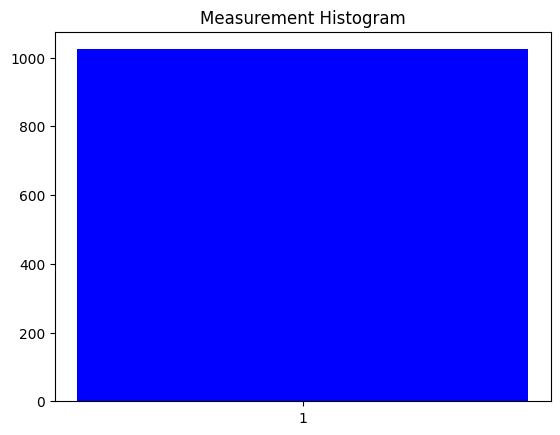

Quantum Circuit


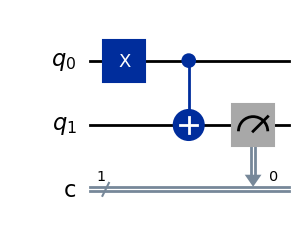

In [8]:
qc = QuantumCircuit(2, 1)

qc.x(0)

qc.cx(0,1)

qc.measure(1, 0)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()


counts = result.get_counts()


plt.bar(counts.keys(), counts.values(), color='blue')
plt.title("Measurement Histogram")
plt.show()

print("Quantum Circuit")
qc.draw('mpl')

## Toffoli

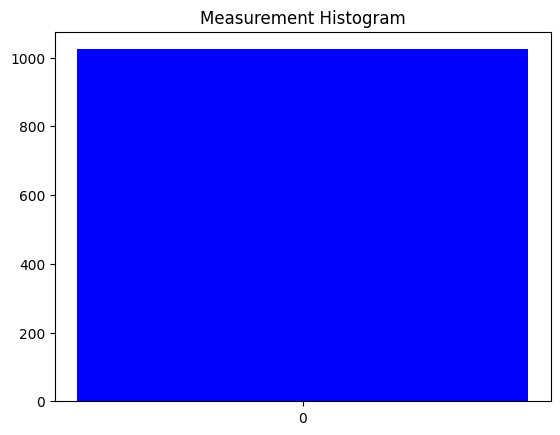

Quantum Circuit


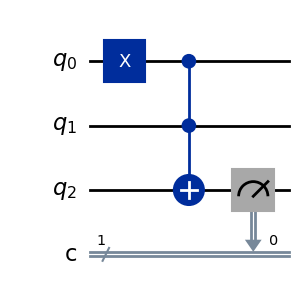

In [9]:
qc = QuantumCircuit(3, 1)

qc.x(0)

# qc.x(1)

qc.ccx(0,1,2)

qc.measure(2, 0)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()


counts = result.get_counts()


plt.bar(counts.keys(), counts.values(), color='blue')
plt.title("Measurement Histogram")
plt.show()

print("Quantum Circuit")
qc.draw('mpl')


## Applications of the CNOT Gate

1. **Entanglement Creation**:
   - The CNOT gate is critical in creating entangled states like the Bell state:
     $$
     \ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}).
     $$
     This is achieved by applying a Hadamard gate on the first qubit, followed by a CNOT gate.

2. **Quantum Error Correction**:
   - The CNOT gate is used in error-correcting codes to spread information across multiple qubits, enabling error detection and correction.

3. **Basis Transformation**:
   - It transforms a computational basis state $$ \ket{00}, \ket{01}, \ket{10}, \ket{11} $$ into another basis for certain algorithms.

---

## Applications of the Toffoli Gate

1. **Classical Logic Simulation**:
   - The Toffoli gate can simulate classical AND and NOT operations in a reversible manner, making it essential for quantum implementations of classical circuits.

2. **Controlled-Controlled Operations**:
   - It enables controlled-controlled operations, acting as a building block for more complex multi-qubit gates.

3. **Universal for Reversible Computation**:
   - The Toffoli gate, along with other single-qubit gates, forms a universal set for reversible computation.

---


## Exercise 1: Understanding the CNOT Gate

Given the initial state:
$$
\ket{\psi} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{01}),
$$
apply the **CNOT gate** to this state. Show that the resulting state is:
$$
\ket{\psi'} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}).
$$

### Solution

The CNOT gate flips the second qubit (target) only when the first qubit (control) is 1. 

1. Write the initial state:
   $$
   \ket{\psi} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{01}).
   $$

2. Apply the CNOT gate:
   - For 00: The control qubit is 0, so the target remains 0.
   - For 01: The control qubit is 0, so the target remains 1.

   Therefore:
   $$
   CNOT \ket{\psi} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}).
   $$

---

## Exercise 2: Toffoli Gate in Action

Consider the state:
$$
\ket{\psi} = \frac{1}{2} (\ket{000} + \ket{001} + \ket{110} + \ket{111}).
$$

Apply the **Toffoli gate** (controlled-controlled NOT) on the first two qubits as controls and the third qubit as the target. Determine the resulting state.

### Solution

The Toffoli gate flips the target qubit only when both control qubits are 1.

1. Analyze each term in psi:
   -  000: Controls are {0,0}, so the target is unchanged.
   -  001: Controls are {0,0}, so the target is unchanged.
   -  110: Controls are {0,0}, so the target 0 flips to 1.
   -  111: Controls are {0,0}, so the target 1 flips to 0.

2. Resulting state:
   $$
   \ket{\psi'} = \frac{1}{2} (\ket{000} + \ket{001} + \ket{111} + \ket{110}).
   $$
